In [249]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import requests
import csv
import json
import datetime

In [202]:
# Study data files
weather_data_path = '../Resources/weather_data_long.csv'
police_gender_path = "../Resources/Police-Employment-Breakout5_4_2021.csv"
police_employment_path = "../Resources/pe_1960_2019.csv"
# Read the data and the study results
weather_df = pd.read_csv(weather_data_path)
police_gender_df = pd.read_csv(police_gender_path, skiprows = 0)
police_employment_df = pd.read_csv(police_employment_path)
weather_2017 = weather_df[(weather_df['date'] >= '2017-01-01')]
weather_2017.to_csv("../Resources/weather_2017.csv", encoding="utf-8", index=False)
police_emp_df = police_employment_df[(police_employment_df['state_postal_abbr'] >= 'MN')]
police_emp_df.to_csv("../Resources/pe_1960_2019.csv", encoding="utf-8", index=False)


In [55]:
weather_df = pd.read_csv("../Resources/weather_2017.csv")
weather_df.columns

Index(['loc_id', 'date', 'maxtempC', 'maxtempF', 'mintempC', 'mintempF',
       'avgtempC', 'avgtempF', 'totalprecipMM', 'totalprecipIn',
       'windspeedMiles', 'windspeedKmph', 'sunhour', 'winddirdegree',
       'winddir16point', 'weatherCode', 'weatherIconUrl', 'weatherDesc',
       'humidity', 'visibilityKm', 'visibilityMiles', 'pressureMB',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [56]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [57]:
new_weather = weather_df[(weather_df['date'] >= '2017-08-31') & (weather_df['date'] <= '2021-03-31')]
new_weather

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
242,1,2017-08-31,24,76,13,56,19,66,0.0,0.00,...,14,19,65,5,06:34 AM,07:52 PM,04:23 PM,01:08 AM,First Quarter,41.4
243,1,2017-09-01,22,72,12,54,18,64,0.2,0.01,...,20,17,63,5,06:35 AM,07:50 PM,05:10 PM,01:55 AM,Waxing Gibbous,55.2
244,1,2017-09-02,26,79,16,61,21,69,3.6,0.14,...,21,21,69,6,06:36 AM,07:48 PM,05:53 PM,02:47 AM,Waxing Gibbous,62.1
245,1,2017-09-03,29,85,16,60,23,73,0.0,0.00,...,21,23,74,6,06:38 AM,07:46 PM,06:31 PM,03:44 AM,Waxing Gibbous,69.0
246,1,2017-09-04,23,73,15,59,19,66,0.4,0.02,...,23,19,66,5,06:39 AM,07:44 PM,07:07 PM,04:44 AM,Full Moon,75.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,1,2021-03-27,11,52,6,42,8,47,5.9,0.23,...,15,6,43,2,07:02 AM,07:35 PM,06:21 PM,06:56 AM,Waning Gibbous,96.6
1547,1,2021-03-28,7,45,2,36,4,39,4.7,0.19,...,32,-1,31,2,07:01 AM,07:37 PM,07:41 PM,07:22 AM,Waning Gibbous,89.7
1548,1,2021-03-29,19,66,4,39,11,51,0.0,0.00,...,34,9,47,4,06:59 AM,07:38 PM,09:01 PM,07:47 AM,Waning Gibbous,82.8
1549,1,2021-03-30,11,52,2,36,5,40,0.7,0.03,...,30,0,32,2,06:57 AM,07:39 PM,10:22 PM,08:12 AM,Waning Gibbous,75.9


In [164]:
weather_month= new_weather.groupby(pd.Grouper(key="date", freq="1M")).mean()
weather_month

,loc_id,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,...,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,moon_illumination
date,,,,,,,,,,,,,,,,,,,,,
2017-08-31,1.0,24.000000,76.000000,13.000000,56.000000,19.000000,66.000000,0.000000,0.000000,7.000000,...,10.000000,50.000000,19.000000,65.000000,9.000000,14.000000,19.000000,65.000000,5.000000,41.400000
2017-09-30,1.0,24.500000,75.900000,15.000000,58.866667,19.600000,67.166667,2.196667,0.086333,8.400000,...,12.366667,54.033333,19.266667,66.566667,11.633333,18.700000,19.633333,67.266667,5.133333,48.300000
2017-10-31,1.0,14.645161,58.193548,8.032258,46.354839,10.935484,51.935484,2.293871,0.089677,9.258065,...,3.580645,38.516129,9.387097,48.806452,12.935484,20.838710,9.387097,48.806452,3.322581,48.522581
2017-11-30,1.0,4.633333,40.266667,-1.833333,28.933333,1.133333,34.100000,0.370000,0.014667,8.266667,...,-5.200000,22.700000,-2.566667,27.400000,11.833333,19.033333,-2.566667,27.400000,1.800000,48.300000
2017-12-31,1.0,-4.967742,23.129032,-9.806452,14.419355,-7.322581,18.741935,0.519355,0.020000,7.354839,...,-10.322581,13.419355,-12.612903,9.225806,10.645161,17.258065,-12.612903,9.225806,1.483871,48.967742
2018-01-31,1.0,-6.000000,21.387097,-12.903226,9.129032,-9.451613,15.032258,1.196774,0.046774,7.580645,...,-11.064516,12.129032,-15.096774,4.806452,11.741935,18.903226,-15.096774,4.806452,1.580645,49.412903
2018-02-28,1.0,-6.178571,20.857143,-13.642857,7.535714,-9.714286,14.357143,0.871429,0.034286,7.142857,...,-11.321429,11.571429,-15.357143,4.250000,10.821429,17.428571,-15.357143,4.250000,1.428571,45.589286
2018-03-31,1.0,2.516129,36.322581,-4.129032,24.838710,-0.903226,30.354839,0.774194,0.029677,7.387097,...,-3.870968,25.032258,-4.580645,23.709677,10.870968,17.548387,-4.580645,23.709677,1.354839,49.635484
2018-04-30,1.0,7.133333,44.800000,-2.100000,28.166667,2.366667,36.366667,1.754333,0.068333,7.666667,...,-2.166667,28.166667,-0.633333,30.966667,11.033333,17.666667,-0.633333,30.966667,2.200000,48.300000


In [165]:
police_emp_df.dtypes

state_postal_abbr          object
data_year                   int64
officer_count             float64
officer_rate_per_1000     float64
civilian_count            float64
civilian_rate_per_1000    float64
population                  int64
dtype: object

In [77]:
police_emp_df.head(60)

,state_postal_abbr,data_year,officer_count,officer_rate_per_1000,civilian_count,civilian_rate_per_1000,population
0,MN,1960,NaN,NaN,NaN,NaN,3422563
1,MN,1961,NaN,NaN,NaN,NaN,3427591
2,MN,1962,NaN,NaN,NaN,NaN,3488592
3,MN,1963,NaN,NaN,NaN,NaN,3520659
4,MN,1964,NaN,NaN,NaN,NaN,3546560
5,MN,1965,NaN,NaN,NaN,NaN,3672699
6,MN,1966,NaN,NaN,NaN,NaN,3603742
7,MN,1967,NaN,NaN,NaN,NaN,3616375
8,MN,1968,NaN,NaN,NaN,NaN,3677859
9,MN,1969,NaN,NaN,NaN,NaN,3738256


In [245]:
new_popo_df = police_emp_df[(police_emp_df['data_year'] >= 2009) & (police_emp_df['data_year'] <= 2019)]
new_popo_df.drop(labels=['officer_rate_per_1000', 'civilian_rate_per_1000'], axis=1, inplace=True)
new_popo_df = new_popo_df.dropna()
new_popo_df = new_popo_df[new_popo_df['data_year'] != 0]
new_popo_df.head(11)

C:\Users\amoha\anaconda31\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state_postal_abbr,data_year,officer_count,civilian_count,population
49,MN,2009,9085.0,4916.0,5529594
50,MN,2010,9183.0,4927.0,5672232
51,MN,2011,9843.0,4847.0,6007235
52,MN,2012,9823.0,4891.0,5999680
53,MN,2013,9900.0,4887.0,6159672
54,MN,2014,10496.0,5312.0,6199760
55,MN,2015,10851.0,5322.0,6242041
56,MN,2016,11224.0,5592.0,6398615
57,MN,2017,11248.0,5812.0,6764070
58,MN,2018,10981.0,6129.0,6575816


In [130]:
newer_popo_df = new_popo_df.rename(columns={"data_year": "Year", "officer_count": "Officer count" , "civilian_count": "Civilian count" , "population": "Population"})
newer_popo_df.head(11)

,state_postal_abbr,Year,Officer count,Civilian count,Population
49,MN,2009,9085.0,4916.0,5529594
50,MN,2010,9183.0,4927.0,5672232
51,MN,2011,9843.0,4847.0,6007235
52,MN,2012,9823.0,4891.0,5999680
53,MN,2013,9900.0,4887.0,6159672
54,MN,2014,10496.0,5312.0,6199760
55,MN,2015,10851.0,5322.0,6242041
56,MN,2016,11224.0,5592.0,6398615
57,MN,2017,11248.0,5812.0,6764070
58,MN,2018,10981.0,6129.0,6575816


In [140]:
officer_count_df = newer_popo_df.loc[newer_popo_df['state_postal_abbr'] == 'MN']

In [141]:
officer_count_df

,state_postal_abbr,Year,Officer count,Civilian count,Population
49,MN,2009,9085.0,4916.0,5529594
50,MN,2010,9183.0,4927.0,5672232
51,MN,2011,9843.0,4847.0,6007235
52,MN,2012,9823.0,4891.0,5999680
53,MN,2013,9900.0,4887.0,6159672
54,MN,2014,10496.0,5312.0,6199760
55,MN,2015,10851.0,5322.0,6242041
56,MN,2016,11224.0,5592.0,6398615
57,MN,2017,11248.0,5812.0,6764070
58,MN,2018,10981.0,6129.0,6575816


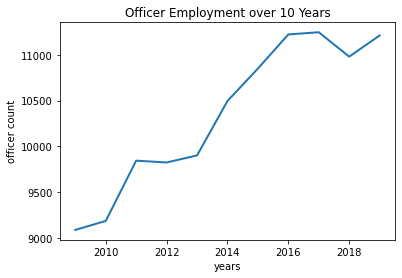

In [174]:
x_axis = officer_count_df["Year"]
y_axis = officer_count_df["Officer count"]

plt.title('Officer Employment over 10 Years')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('years')
plt.ylabel('officer count')
plt.savefig('Officer Employment over 10 Years')
plt.show()

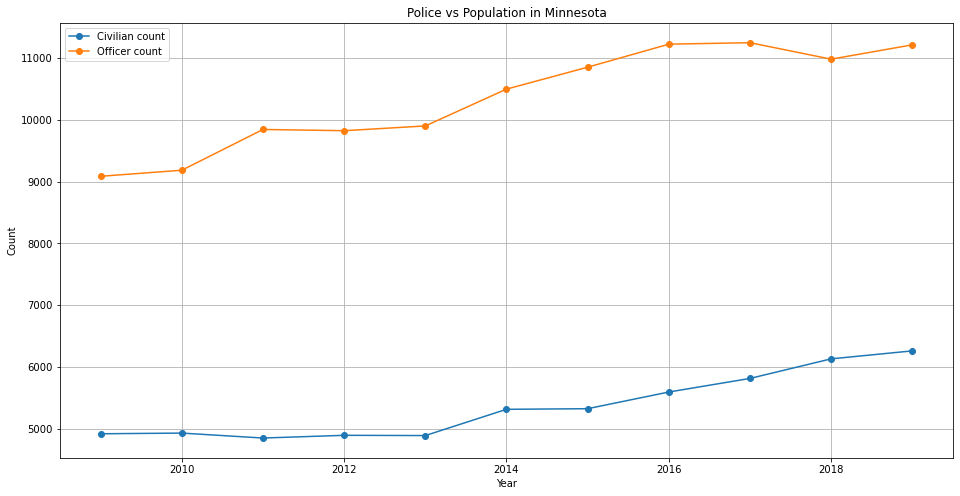

In [157]:
# Listing the labels for the x axis
labels = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
          ]

x_values = officer_count_df["Officer count"]
y_values = officer_count_df["Civilian count"]
plt.figure(figsize=(16, 8))
plt.plot(labels, y_values, marker='o', label='Civilian count')
plt.plot(labels, x_values, marker='o', label='Officer count')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Police vs Population in Minnesota')
plt.legend()
plt.savefig('Police vs Population in Minnesota')
plt.show()

The r-value is: 0.9975427635028682


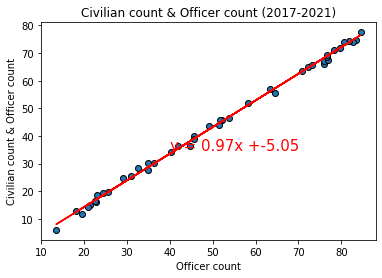

In [250]:
# Perform a linear regression on Temperature vs. Rape
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel('Officer count')
plt.ylabel('Civilian count & Officer count')
plt.title('Civilian count & Officer count (2017-2021)')
plt.savefig('line_reg for Civilian count vs Officer count')
print(f"The r-value is: {rvalue**2}")

In [251]:
officer1_count_df = officer_count_df[(officer_count_df['Year'] >= 2017) & (officer_count_df['Year'] <= 2019)]

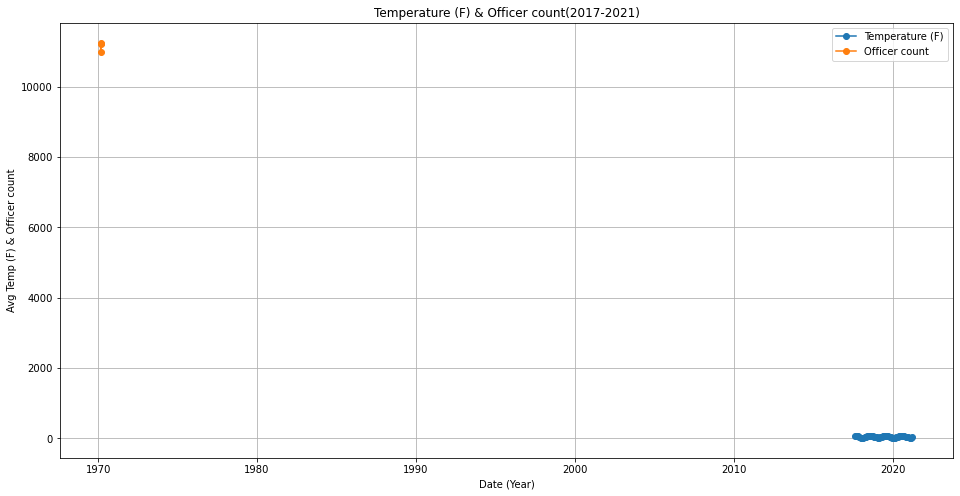

In [252]:
years =[2017, 2018, 2019] 
x_values = officer1_count_df["Officer count"]
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Temperature (F)')
plt.plot(x_values, marker='o', label='Officer count')
plt.grid()
plt.xlabel('Date (Year)')
plt.ylabel('Avg Temp (F) & Officer count')
plt.title('Temperature (F) & Officer count(2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Officer count(2017-2021)')
plt.show()

In [175]:
police_gender_df.head()

,series,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Male Officers,281,282,280,279,282,270,270,272,270,266,273
1,Female Officers,49,50,50,56,55,49,50,49,50,52,53
2,Male Civilians,217,219,202,200,200,220,247,253,253,258,259
3,Female Civilians,241,233,213,213,213,217,208,218,236,243,245


In [185]:
police_gender_df.dtypes

series    object
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
2019       int64
dtype: object

In [230]:
police_gender_df = police_gender_df.transpose()
police_gender_df

,series,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Male Officers,281,282,280,279,282,270,270,272,270,266,273
1,Female Officers,49,50,50,56,55,49,50,49,50,52,53
2,Male Civilians,217,219,202,200,200,220,247,253,253,258,259
3,Female Civilians,241,233,213,213,213,217,208,218,236,243,245


In [231]:
police_gender_df

,series,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Male Officers,281,282,280,279,282,270,270,272,270,266,273
1,Female Officers,49,50,50,56,55,49,50,49,50,52,53
2,Male Civilians,217,219,202,200,200,220,247,253,253,258,259
3,Female Civilians,241,233,213,213,213,217,208,218,236,243,245


In [237]:
police1_gd_df = pd.DataFrame({"Year": [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
                              "Male Officers": [281,282,280,279,282,270,270,272,270,266,273],"Female Officers":[49,50,50,56,55,49,50,49,50,52,53]
                             })
police1_gd_df.head()

,Year,Male Officers,Female Officers
0,2009,281,49
1,2010,282,50
2,2011,280,50
3,2012,279,56
4,2013,282,55


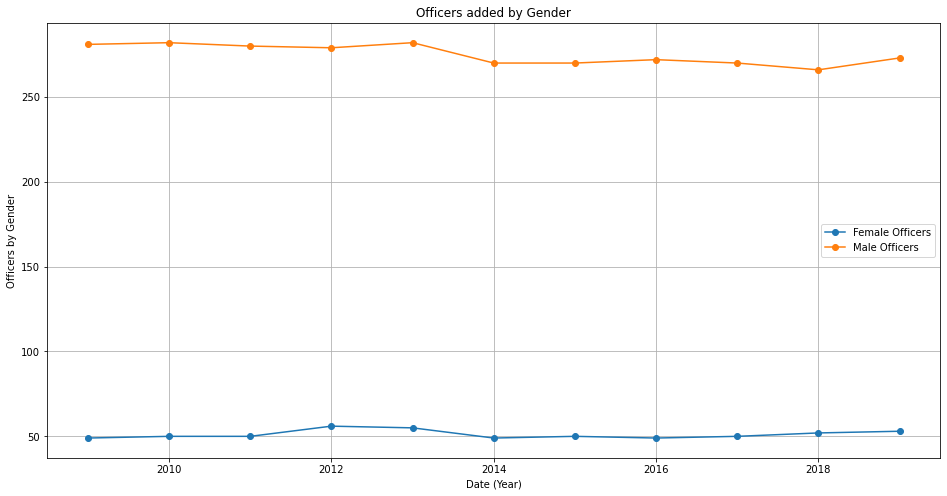

In [253]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 
x_values = police1_gd_df["Male Officers"]
y_values = police1_gd_df['Female Officers']
plt.figure(figsize=(16, 8))
plt.plot(years,y_values, marker='o', label='Female Officers')
plt.plot(years,x_values, marker='o', label='Male Officers')
plt.grid()
plt.xlabel('Date (Year)')
plt.ylabel('Officers by Gender')
plt.title('Officers added by Gender')
plt.legend()
plt.savefig('Officers added by Gender')
plt.show()

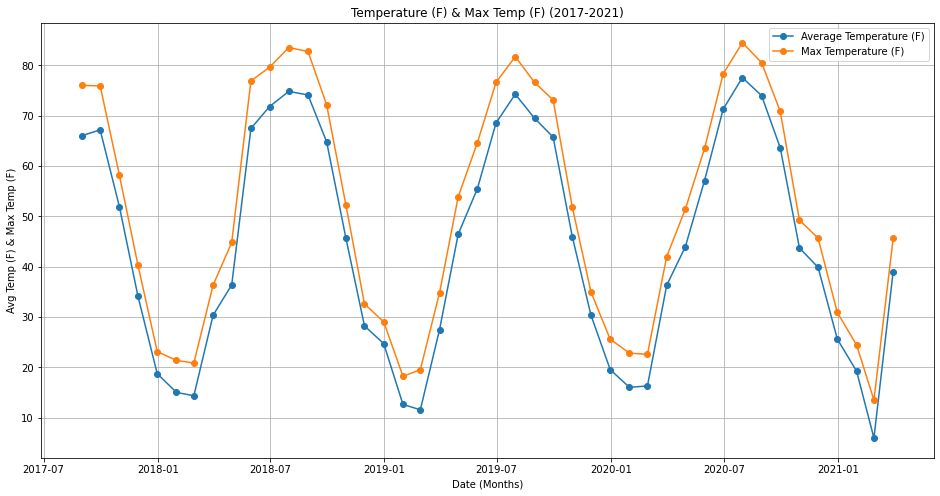

In [254]:
x_values = weather_month['maxtempF']
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Average Temperature (F)')
plt.plot(x_values, marker='o', label='Max Temperature (F)')
plt.grid()
plt.xlabel('Date (Months)')
plt.ylabel('Avg Temp (F) & Max Temp (F)')
plt.title('Temperature (F) & Max Temp (F) (2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Max Temp (F) (2017-2021)')
plt.show()